## ML PROJECT(AKATSUKI)

In [1]:
# Importing the required Dependencies
import csv
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the Raw Dataset
df = pd.read_excel('raw_data.xlsx')

In [3]:
# Displaying the first five rows
df.head()

Disease  Count of Disease Occurrence  \
0  UMLS:C0020538_hypertensive disease                       3363.0   
1                                 NaN                          NaN   
2                                 NaN                          NaN   
3                                 NaN                          NaN   
4                                 NaN                          NaN   

                             Symptom  
0           UMLS:C0008031_pain chest  
1  UMLS:C0392680_shortness of breath  
2            UMLS:C0012833_dizziness  
3             UMLS:C0004093_asthenia  
4                 UMLS:C0085639_fall

In [4]:
# Filling all NaN with the values above
data = df.fillna(method='ffill')

C:\Users\saiha\AppData\Local\Temp\ipykernel_19760\1269294239.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = df.fillna(method='ffill')


In [5]:
# Displaying the first five rows of the new data
data.head()

Disease  Count of Disease Occurrence  \
0  UMLS:C0020538_hypertensive disease                       3363.0   
1  UMLS:C0020538_hypertensive disease                       3363.0   
2  UMLS:C0020538_hypertensive disease                       3363.0   
3  UMLS:C0020538_hypertensive disease                       3363.0   
4  UMLS:C0020538_hypertensive disease                       3363.0   

                             Symptom  
0           UMLS:C0008031_pain chest  
1  UMLS:C0392680_shortness of breath  
2            UMLS:C0012833_dizziness  
3             UMLS:C0004093_asthenia  
4                 UMLS:C0085639_fall

In [6]:
# Displaying the last five rows of the new data
data.tail()

Disease  Count of Disease Occurrence  \
1861    UMLS:C0233472_affect labile                         45.0   
1862    UMLS:C0233472_affect labile                         45.0   
1863  UMLS:C0011127_decubitus ulcer                         42.0   
1864  UMLS:C0011127_decubitus ulcer                         42.0   
1865  UMLS:C0011127_decubitus ulcer                         42.0   

                                              Symptom  
1861  UMLS:C0425251_bedridden^UMLS:C0741453_bedridden  
1862                         UMLS:C0242453_prostatism  
1863                    UMLS:C0232257_systolic murmur  
1864                              UMLS:C0871754_frail  
1865                              UMLS:C0015967_fever

In [7]:
# Displaying the columns of the new data
data.columns

Index(['Disease', 'Count of Disease Occurrence', 'Symptom'], dtype='object')

In [8]:
# Displaying the shape of the new data(Rows and Columns)
data.shape

(1866, 3)

In [9]:
# Displaying the description of the new data
data.describe()

Count of Disease Occurrence
count                  1866.000000
mean                    253.405145
std                     354.214115
min                      42.000000
25%                      92.000000
50%                     144.000000
75%                     280.000000
max                    3363.000000

In [10]:
## Displaying the sum of the number of missing values of the new data
data.isnull().sum()

Disease                        0
Count of Disease Occurrence    0
Symptom                        0
dtype: int64

C:\Users\saiha\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


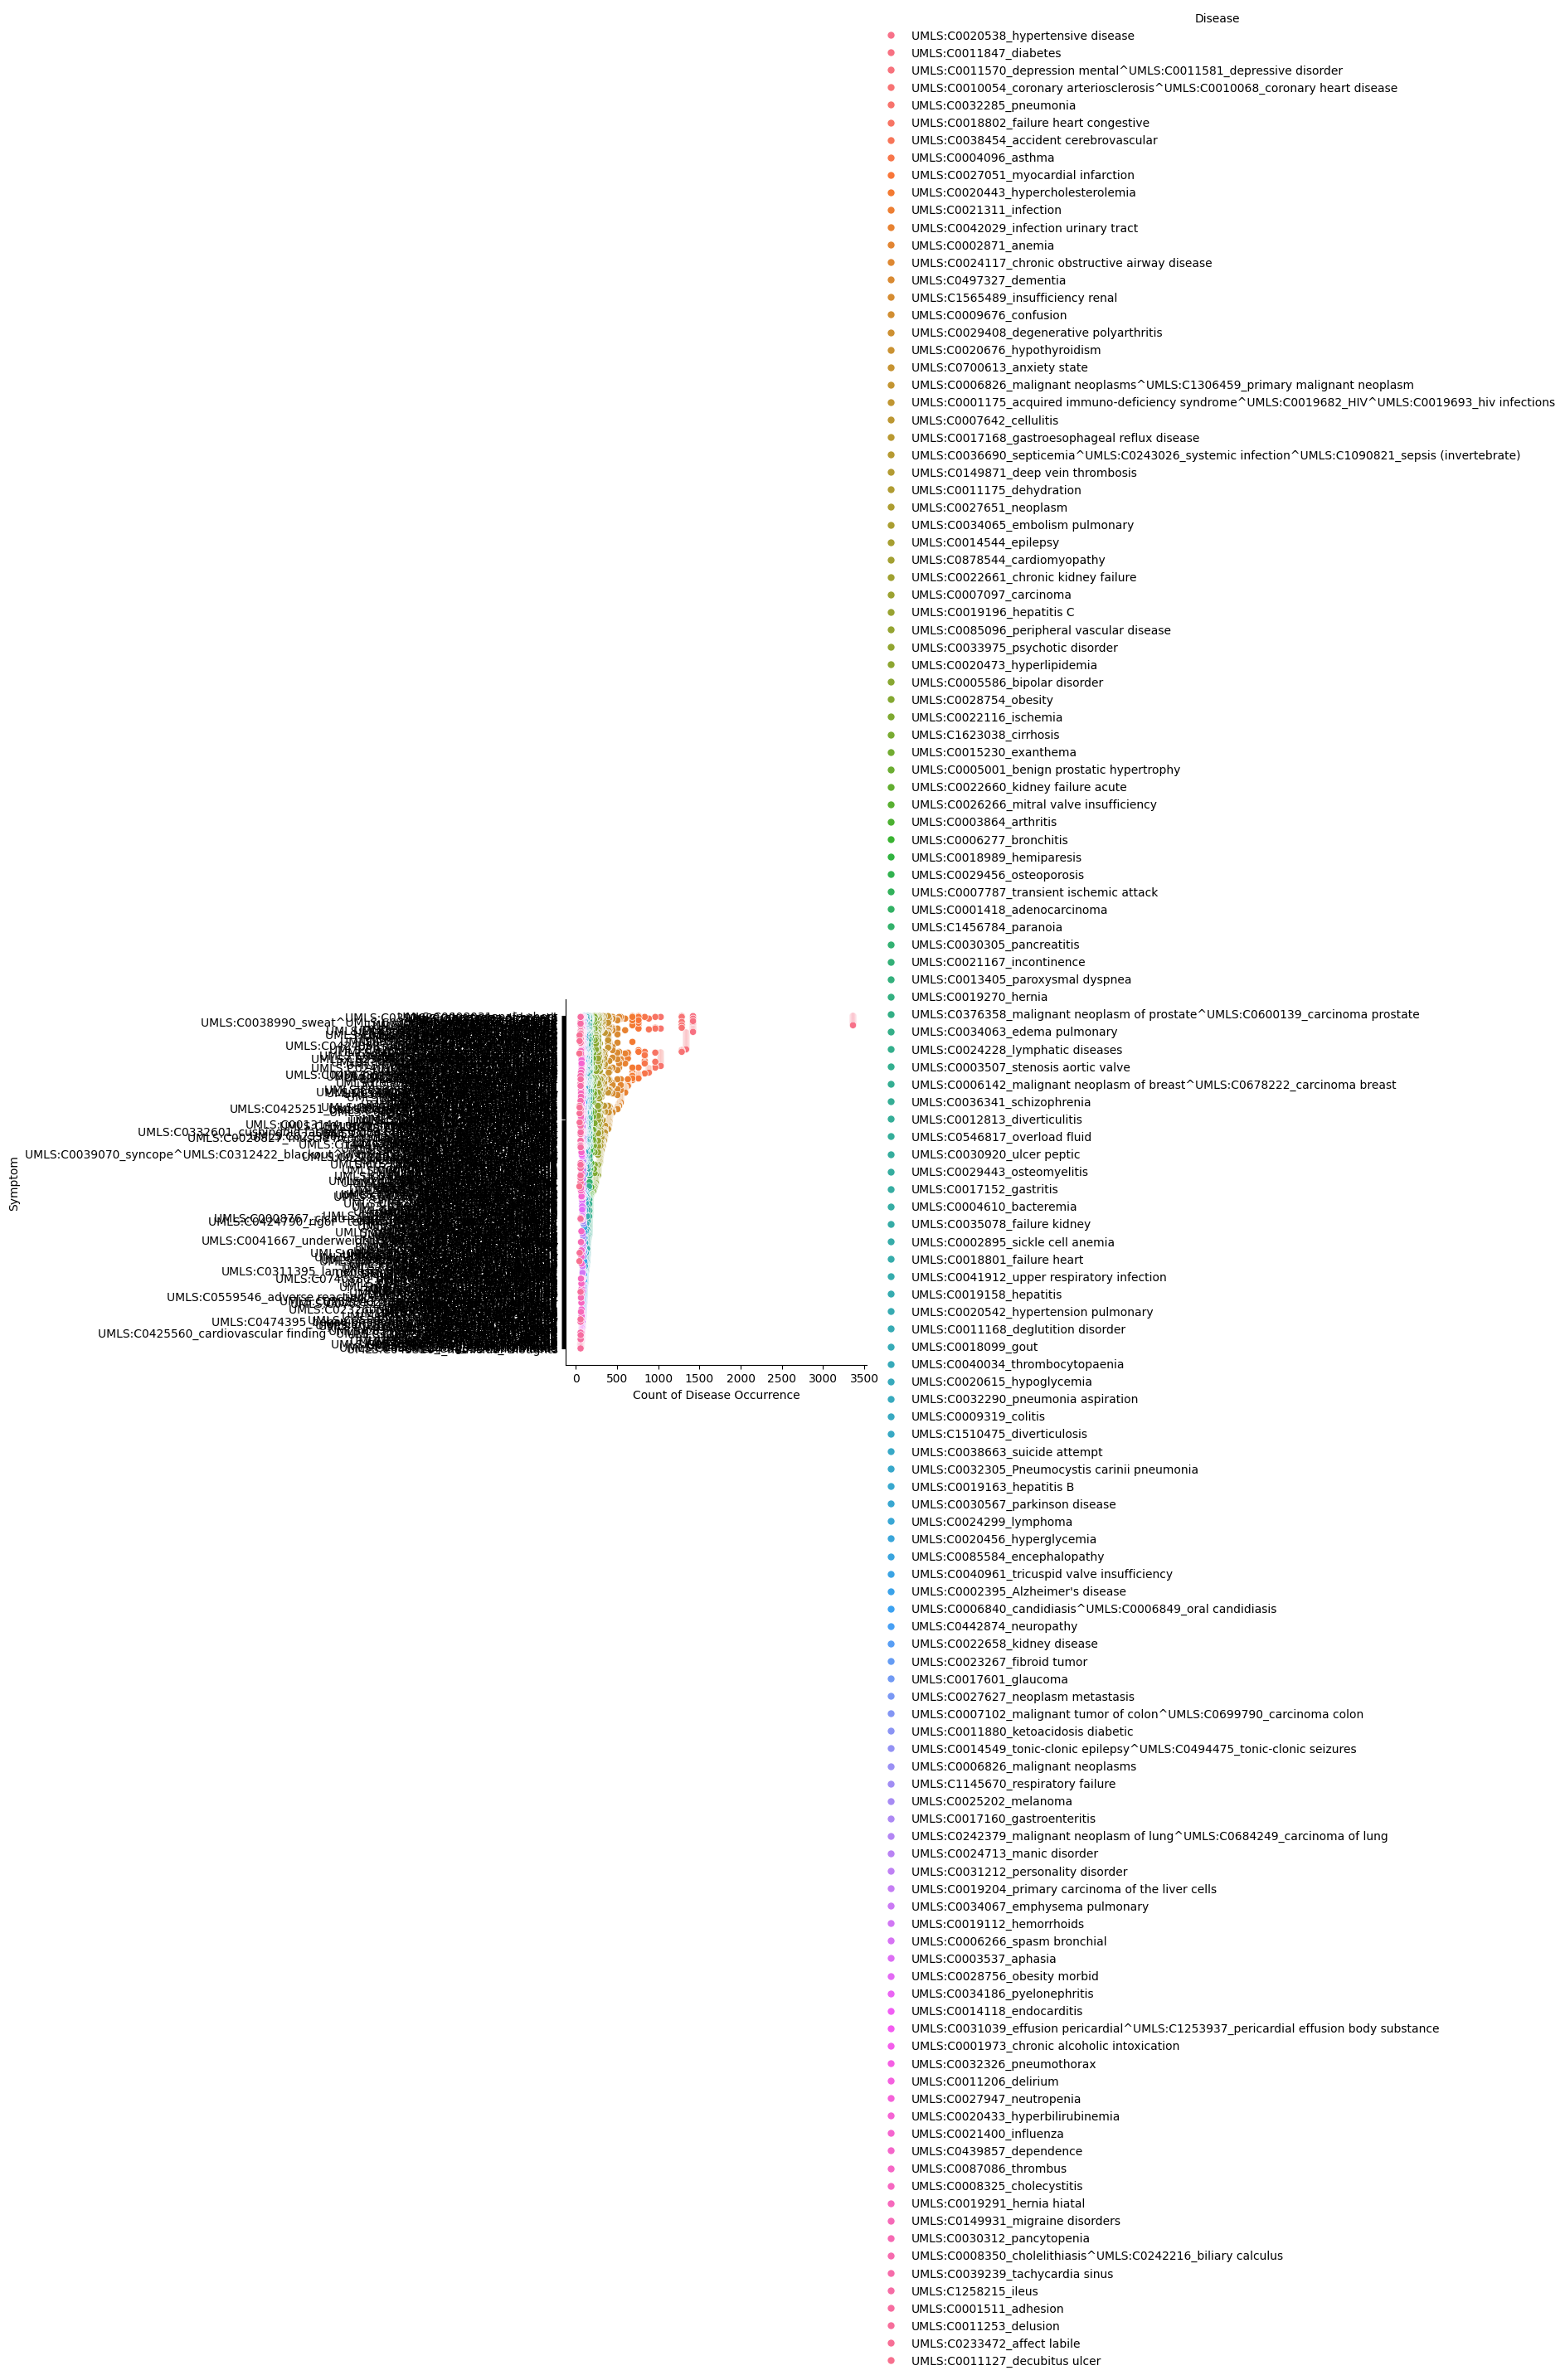

In [11]:
sns.relplot(x='Count of Disease Occurrence' , y='Symptom' ,hue ='Disease', data=data)

In [12]:
# Processing the Disease and the Symptom Names
def process_data(data):
    data_list = []
    data_name = data.replace('^','_').split('_')
    n = 1
    for names in data_name:
        if (n % 2 == 0):
            data_list.append(names)
        n += 1
    return data_list

In [13]:
# Cleaning up the data
disease_list = []
disease_symptom_dict = defaultdict(list)
disease_symptom_count = {}
count = 0

for idx, row in data.iterrows():
    
    # Get the Disease Names
    if (row['Disease'] !="\xc2\xa0") and (row['Disease'] != ""):
        disease = row['Disease']
        disease_list = process_data(data=disease)
        count = row['Count of Disease Occurrence']

    # Get the Symptoms Corresponding to Diseases
    if (row['Symptom'] !="\xc2\xa0") and (row['Symptom'] != ""):
        symptom = row['Symptom']
        symptom_list = process_data(data=symptom)
        for d in disease_list:
            for s in symptom_list:
                disease_symptom_dict[d].append(s)
            disease_symptom_count[d] = count

In [14]:
# Seeing that the data is Processed Correctly
disease_symptom_dict

defaultdict(list,
            {'hypertensive disease': ['pain chest',
              'shortness of breath',
              'dizziness',
              'asthenia',
              'fall',
              'syncope',
              'vertigo',
              'sweat',
              'sweating increased',
              'palpitation',
              'nausea',
              'angina pectoris',
              'pressure chest'],
             'diabetes': ['polyuria',
              'polydypsia',
              'shortness of breath',
              'pain chest',
              'asthenia',
              'nausea',
              'orthopnea',
              'rale',
              'sweat',
              'sweating increased',
              'unresponsiveness',
              'mental status changes',
              'vertigo',
              'vomiting',
              'labored breathing'],
             'depression mental': ['feeling suicidal',
              'suicidal',
              'hallucinations auditory',
              'feel

In [15]:
# Count of Disease Occurence with respect to each Disease
disease_symptom_count

{'hypertensive disease': 3363.0,
 'diabetes': 1421.0,
 'depression mental': 1337.0,
 'depressive disorder': 1337.0,
 'coronary arteriosclerosis': 1284.0,
 'coronary heart disease': 1284.0,
 'pneumonia': 1029.0,
 'failure heart congestive': 963.0,
 'accident\xa0cerebrovascular': 885.0,
 'asthma': 835.0,
 'myocardial infarction': 759.0,
 'hypercholesterolemia': 685.0,
 'infection': 630.0,
 'infection urinary tract': 597.0,
 'anemia': 544.0,
 'chronic obstructive airway disease': 524.0,
 'dementia': 504.0,
 'insufficiency renal': 445.0,
 'confusion': 408.0,
 'degenerative\xa0polyarthritis': 405.0,
 'hypothyroidism': 398.0,
 'anxiety state': 390.0,
 'malignant neoplasms': 354.0,
 'primary malignant neoplasm': 354.0,
 'acquired\xa0immuno-deficiency syndrome': 350.0,
 'HIV': 350.0,
 'hiv infections': 350.0,
 'cellulitis': 341.0,
 'gastroesophageal reflux disease': 325.0,
 'septicemia': 311.0,
 'systemic infection': 311.0,
 'sepsis (invertebrate)': 311.0,
 'deep vein thrombosis': 310.0,
 'deh

In [16]:
# Saving the cleaned data as CSV
f = open('cleaned_data.csv', 'w')

with f:
    writer = csv.writer(f)
    for key, val in disease_symptom_dict.items():
        for i in range(len(val)):
            writer.writerow([key, val[i], disease_symptom_count[key]])

In [17]:
df.to_csv('cleaned_data.csv',index=False)

In [18]:
# Reading the Cleaned Data as DF
df = pd.read_csv('cleaned_data.csv')
df.columns = ['disease','occurence_count','symptom']
df.head()

disease  occurence_count  \
0  UMLS:C0020538_hypertensive disease           3363.0   
1                                 NaN              NaN   
2                                 NaN              NaN   
3                                 NaN              NaN   
4                                 NaN              NaN   

                             symptom  
0           UMLS:C0008031_pain chest  
1  UMLS:C0392680_shortness of breath  
2            UMLS:C0012833_dizziness  
3             UMLS:C0004093_asthenia  
4                 UMLS:C0085639_fall

In [19]:
# Filling all the NaN with the values above
df = df.fillna(method='ffill')

C:\Users\saiha\AppData\Local\Temp\ipykernel_19760\231107242.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [20]:
# Displaying the first five rows of the new data
df.head()

disease  occurence_count  \
0  UMLS:C0020538_hypertensive disease           3363.0   
1  UMLS:C0020538_hypertensive disease           3363.0   
2  UMLS:C0020538_hypertensive disease           3363.0   
3  UMLS:C0020538_hypertensive disease           3363.0   
4  UMLS:C0020538_hypertensive disease           3363.0   

                             symptom  
0           UMLS:C0008031_pain chest  
1  UMLS:C0392680_shortness of breath  
2            UMLS:C0012833_dizziness  
3             UMLS:C0004093_asthenia  
4                 UMLS:C0085639_fall

In [21]:
# Removing any rows with empty values
df.replace(float('nan'), np.nan, inplace=True)
df.dropna(inplace=True)

In [22]:
!pip install sklearn

In [23]:
from sklearn import preprocessing

In [24]:
n_unique = len(df['symptom'].unique())
n_unique

401

In [25]:
# Displaying the types of the new data
df.dtypes

disease             object
occurence_count    float64
symptom             object
dtype: object

In [26]:
# Encoding the Labels
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['symptom'])
print(integer_encoded)

[ 17 270  27 ... 168 376  38]


In [27]:
# One Hot Encode the Labels
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


C:\Users\saiha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
onehot_encoded[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
len(onehot_encoded[0])

401

In [30]:
cols = np.asarray(df['symptom'].unique())
cols

array(['UMLS:C0008031_pain chest', 'UMLS:C0392680_shortness of breath',
       'UMLS:C0012833_dizziness', 'UMLS:C0004093_asthenia',
       'UMLS:C0085639_fall', 'UMLS:C0039070_syncope',
       'UMLS:C0042571_vertigo',
       'UMLS:C0038990_sweat^UMLS:C0700590_sweating increased',
       'UMLS:C0030252_palpitation', 'UMLS:C0027497_nausea',
       'UMLS:C0002962_angina pectoris', 'UMLS:C0438716_pressure chest',
       'UMLS:C0032617_polyuria', 'UMLS:C0085602_polydypsia',
       'UMLS:C0085619_orthopnea', 'UMLS:C0034642_rale',
       'UMLS:C0241526_unresponsiveness',
       'UMLS:C0856054_mental status changes', 'UMLS:C0042963_vomiting',
       'UMLS:C0553668_labored breathing',
       'UMLS:C0424000_feeling suicidal', 'UMLS:C0438696_suicidal',
       'UMLS:C0233762_hallucinations auditory',
       'UMLS:C0150041_feeling hopeless', 'UMLS:C0424109_weepiness',
       'UMLS:C0917801_sleeplessness', 'UMLS:C0424230_motor retardation',
       'UMLS:C0022107_irritable mood', 'UMLS:C0312422_black

In [31]:
# Creating a new dataframe to save OHE labels
df_ohe = pd.DataFrame(columns = cols)
df_ohe.head()

Empty DataFrame
Columns: [UMLS:C0008031_pain chest, UMLS:C0392680_shortness of breath, UMLS:C0012833_dizziness, UMLS:C0004093_asthenia, UMLS:C0085639_fall, UMLS:C0039070_syncope, UMLS:C0042571_vertigo, UMLS:C0038990_sweat^UMLS:C0700590_sweating increased, UMLS:C0030252_palpitation, UMLS:C0027497_nausea, UMLS:C0002962_angina pectoris, UMLS:C0438716_pressure chest, UMLS:C0032617_polyuria, UMLS:C0085602_polydypsia, UMLS:C0085619_orthopnea, UMLS:C0034642_rale, UMLS:C0241526_unresponsiveness, UMLS:C0856054_mental status changes, UMLS:C0042963_vomiting, UMLS:C0553668_labored breathing, UMLS:C0424000_feeling suicidal, UMLS:C0438696_suicidal, UMLS:C0233762_hallucinations auditory, UMLS:C0150041_feeling hopeless, UMLS:C0424109_weepiness, UMLS:C0917801_sleeplessness, UMLS:C0424230_motor retardation, UMLS:C0022107_irritable mood, UMLS:C0312422_blackout, UMLS:C0344315_mood depressed, UMLS:C0233763_hallucinations visual, UMLS:C0233481_worry, UMLS:C0085631_agitation, UMLS:C0040822_tremor, UMLS:C0728899_intoxication, UMLS:C0424068_verbal auditory hallucinations, UMLS:C0455769_energy increased, UMLS:C1299586_difficulty, UMLS:C0028084_nightmare, UMLS:C0235198_unable to concentrate, UMLS:C0237154_homelessness, UMLS:C0086439_hypokinesia, UMLS:C0231807_dyspnea on exertion, UMLS:C0232292_chest tightness, UMLS:C0010200_cough, UMLS:C0015967_fever, UMLS:C0029053_decreased translucency, UMLS:C0239134_productive cough, UMLS:C0008033_pleuritic pain, UMLS:C0457096_yellow sputum, UMLS:C0238844_breath sounds decreased, UMLS:C0085593_chill, UMLS:C0035508_rhonchus, UMLS:C0457097_green sputum, UMLS:C0850149_non-productive cough, UMLS:C0043144_wheezing, UMLS:C0019079_haemoptysis, UMLS:C0476273_distress respiratory, UMLS:C0231835_tachypnea, UMLS:C0231218_malaise, UMLS:C0028081_night sweat, UMLS:C0240100_jugular venous distention, UMLS:C0013404_dyspnea, UMLS:C0013362_dysarthria, UMLS:C0234518_speech slurred, UMLS:C0427055_facial paresis, UMLS:C0018991_hemiplegia, UMLS:C0036572_seizure, UMLS:C0028643_numbness, UMLS:C0436331_symptom aggravating factors, UMLS:C0520886_st segment elevation, UMLS:C0520887_st segment depression, UMLS:C0520888_t wave inverted, UMLS:C1305739_presence of q wave, UMLS:C0235710_chest discomfort, UMLS:C0428977_bradycardia, UMLS:C0030193_pain, UMLS:C0337672_nonsmoker, UMLS:C0041834_erythema, UMLS:C0019214_hepatosplenomegaly, UMLS:C0033774_pruritus, UMLS:C0011991_diarrhea, UMLS:C0549483_abscess bacterial, UMLS:C0038999_swelling, UMLS:C0277797_apyrexial, UMLS:C0013428_dysuria, UMLS:C0018965_hematuria, UMLS:C0235634_renal angle tenderness, UMLS:C0023380_lethargy, UMLS:C0020625_hyponatremia, UMLS:C0578150_hemodynamically stable, UMLS:C0241705_difficulty passing urine, UMLS:C0239110_consciousness clear, UMLS:C0744492_guaiac positive, UMLS:C0746619_monoclonal, UMLS:C0013491_ecchymosis, UMLS:C1269955_tumor cell invasion, UMLS:C0019080_haemorrhage, UMLS:C0030232_pallor, UMLS:C0015672_fatigue, ...]
Index: []

[0 rows x 401 columns]

In [32]:
for i in range(len(onehot_encoded)):
    df_ohe.loc[i] = onehot_encoded[i]

In [33]:
# Displaying the first five rows of the new data
df_ohe.head()

UMLS:C0008031_pain chest  UMLS:C0392680_shortness of breath  \
0                       0.0                                0.0   
1                       0.0                                0.0   
2                       0.0                                0.0   
3                       0.0                                0.0   
4                       0.0                                0.0   

   UMLS:C0012833_dizziness  UMLS:C0004093_asthenia  UMLS:C0085639_fall  \
0                      0.0                     0.0                 0.0   
1                      0.0                     0.0                 0.0   
2                      0.0                     0.0                 0.0   
3                      0.0                     0.0                 0.0   
4                      0.0                     0.0                 0.0   

   UMLS:C0039070_syncope  UMLS:C0042571_vertigo  \
0                    0.0                    0.0   
1                    0.0                    0.0   
2                    0.0                    0.0   
3                    0.0                    0.0   
4                    0.0                    0.0   

   UMLS:C0038990_sweat^UMLS:C0700590_sweating increased  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   UMLS:C0030252_palpitation  UMLS:C0027497_nausea  ...  \
0                        0.0                   0.0  ...   
1                        0.0                   0.0  ...   
2                        0.0                   0.0  ...   
3                        0.0                   1.0  ...   
4                        0.0                   0.0  ...   

   UMLS:C0474505_feces in rectum  UMLS:C0240805_prodrome  \
0                            0.0                     0.0   
1                            0.0                     0.0   
2                            0.0                     0.0   
3                            0.0                     0.0   
4                            0.0                     0.0   

   UMLS:C0020639_hypoproteinemia  UMLS:C0556346_alcohol binge episode  \
0                            0.0                                  0.0   
1                            0.0                                  0.0   
2                            0.0                                  0.0   
3                            0.0                                  0.0   
4                            0.0                                  0.0   

   UMLS:C0000727_abdomen acute  UMLS:C0740844_air fluid level  \
0                          0.0                            0.0   
1                          0.0                            0.0   
2                          0.0                            0.0   
3                          0.0                            0.0   
4                          0.0                            0.0   

   UMLS:C0425491_catching breath  UMLS:C0456091_large-for-dates fetus  \
0                            0.0                                  0.0   
1                            0.0                                  0.0   
2                            0.0                                  0.0   
3                            0.0                                  0.0   
4                            0.0                                  0.0   

   UMLS:C0231441_immobile  UMLS:C0455204_homicidal thoughts  
0                     0.0                               0.0  
1                     0.0                               0.0  
2                     0.0                               0.0  
3                     0.0                               0.0  
4                     0.0                               0.0  

[5 rows x 401 columns]

In [34]:
# Displaying length of the new data
len(df_ohe)

1866

In [35]:
# Disease Dataframe
df_disease = df['disease']
df_disease.head()

0    UMLS:C0020538_hypertensive disease
1    UMLS:C0020538_hypertensive disease
2    UMLS:C0020538_hypertensive disease
3    UMLS:C0020538_hypertensive disease
4    UMLS:C0020538_hypertensive disease
Name: disease, dtype: object

In [36]:
# Concatenating OHE Labels with the Disease Column
df_concat = pd.concat([df_disease,df_ohe], axis=1)
df_concat.head()

disease  UMLS:C0008031_pain chest  \
0  UMLS:C0020538_hypertensive disease                       0.0   
1  UMLS:C0020538_hypertensive disease                       0.0   
2  UMLS:C0020538_hypertensive disease                       0.0   
3  UMLS:C0020538_hypertensive disease                       0.0   
4  UMLS:C0020538_hypertensive disease                       0.0   

   UMLS:C0392680_shortness of breath  UMLS:C0012833_dizziness  \
0                                0.0                      0.0   
1                                0.0                      0.0   
2                                0.0                      0.0   
3                                0.0                      0.0   
4                                0.0                      0.0   

   UMLS:C0004093_asthenia  UMLS:C0085639_fall  UMLS:C0039070_syncope  \
0                     0.0                 0.0                    0.0   
1                     0.0                 0.0                    0.0   
2                     0.0                 0.0                    0.0   
3                     0.0                 0.0                    0.0   
4                     0.0                 0.0                    0.0   

   UMLS:C0042571_vertigo  \
0                    0.0   
1                    0.0   
2                    0.0   
3                    0.0   
4                    0.0   

   UMLS:C0038990_sweat^UMLS:C0700590_sweating increased  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   UMLS:C0030252_palpitation  ...  UMLS:C0474505_feces in rectum  \
0                        0.0  ...                            0.0   
1                        0.0  ...                            0.0   
2                        0.0  ...                            0.0   
3                        0.0  ...                            0.0   
4                        0.0  ...                            0.0   

   UMLS:C0240805_prodrome  UMLS:C0020639_hypoproteinemia  \
0                     0.0                            0.0   
1                     0.0                            0.0   
2                     0.0                            0.0   
3                     0.0                            0.0   
4                     0.0                            0.0   

   UMLS:C0556346_alcohol binge episode  UMLS:C0000727_abdomen acute  \
0                                  0.0                          0.0   
1                                  0.0                          0.0   
2                                  0.0                          0.0   
3                                  0.0                          0.0   
4                                  0.0                          0.0   

   UMLS:C0740844_air fluid level  UMLS:C0425491_catching breath  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   

   UMLS:C0456091_large-for-dates fetus  UMLS:C0231441_immobile  \
0                                  0.0                     0.0   
1                                  0.0                     0.0   
2                                  0.0                     0.0   
3                                  0.0                     0.0   
4                                  0.0                     0.0   

   UMLS:C0455204_homicidal thoughts  
0                               0.0  
1                               0.0  
2                               0.0  
3                               0.0  
4                               0.0  

[5 rows x 402 columns]

In [37]:
df_concat.drop_duplicates(keep='first',inplace=True)

In [38]:
df_concat.head()

disease  UMLS:C0008031_pain chest  \
0  UMLS:C0020538_hypertensive disease                       0.0   
1  UMLS:C0020538_hypertensive disease                       0.0   
2  UMLS:C0020538_hypertensive disease                       0.0   
3  UMLS:C0020538_hypertensive disease                       0.0   
4  UMLS:C0020538_hypertensive disease                       0.0   

   UMLS:C0392680_shortness of breath  UMLS:C0012833_dizziness  \
0                                0.0                      0.0   
1                                0.0                      0.0   
2                                0.0                      0.0   
3                                0.0                      0.0   
4                                0.0                      0.0   

   UMLS:C0004093_asthenia  UMLS:C0085639_fall  UMLS:C0039070_syncope  \
0                     0.0                 0.0                    0.0   
1                     0.0                 0.0                    0.0   
2                     0.0                 0.0                    0.0   
3                     0.0                 0.0                    0.0   
4                     0.0                 0.0                    0.0   

   UMLS:C0042571_vertigo  \
0                    0.0   
1                    0.0   
2                    0.0   
3                    0.0   
4                    0.0   

   UMLS:C0038990_sweat^UMLS:C0700590_sweating increased  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   UMLS:C0030252_palpitation  ...  UMLS:C0474505_feces in rectum  \
0                        0.0  ...                            0.0   
1                        0.0  ...                            0.0   
2                        0.0  ...                            0.0   
3                        0.0  ...                            0.0   
4                        0.0  ...                            0.0   

   UMLS:C0240805_prodrome  UMLS:C0020639_hypoproteinemia  \
0                     0.0                            0.0   
1                     0.0                            0.0   
2                     0.0                            0.0   
3                     0.0                            0.0   
4                     0.0                            0.0   

   UMLS:C0556346_alcohol binge episode  UMLS:C0000727_abdomen acute  \
0                                  0.0                          0.0   
1                                  0.0                          0.0   
2                                  0.0                          0.0   
3                                  0.0                          0.0   
4                                  0.0                          0.0   

   UMLS:C0740844_air fluid level  UMLS:C0425491_catching breath  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   

   UMLS:C0456091_large-for-dates fetus  UMLS:C0231441_immobile  \
0                                  0.0                     0.0   
1                                  0.0                     0.0   
2                                  0.0                     0.0   
3                                  0.0                     0.0   
4                                  0.0                     0.0   

   UMLS:C0455204_homicidal thoughts  
0                               0.0  
1                               0.0  
2                               0.0  
3                               0.0  
4                               0.0  

[5 rows x 402 columns]

In [39]:
# Displaying the length of the new data
len(df_concat)

1858

In [40]:
cols = df_concat.columns
cols

Index(['disease', 'UMLS:C0008031_pain chest',
       'UMLS:C0392680_shortness of breath', 'UMLS:C0012833_dizziness',
       'UMLS:C0004093_asthenia', 'UMLS:C0085639_fall', 'UMLS:C0039070_syncope',
       'UMLS:C0042571_vertigo',
       'UMLS:C0038990_sweat^UMLS:C0700590_sweating increased',
       'UMLS:C0030252_palpitation',
       ...
       'UMLS:C0474505_feces in rectum', 'UMLS:C0240805_prodrome',
       'UMLS:C0020639_hypoproteinemia', 'UMLS:C0556346_alcohol binge episode',
       'UMLS:C0000727_abdomen acute', 'UMLS:C0740844_air fluid level',
       'UMLS:C0425491_catching breath', 'UMLS:C0456091_large-for-dates fetus',
       'UMLS:C0231441_immobile', 'UMLS:C0455204_homicidal thoughts'],
      dtype='object', length=402)

In [41]:
cols = cols[1:]

In [42]:
# Since, every disease has multiple symptoms, combining all the symptoms per disease per row
df_concat = df_concat.groupby('disease').sum()
df_concat = df_concat.reset_index()
df_concat[:5]

disease  \
0  UMLS:C0001175_acquired immuno-deficiency syndr...   
1                       UMLS:C0001418_adenocarcinoma   
2                             UMLS:C0001511_adhesion   
3       UMLS:C0001973_chronic alcoholic intoxication   
4                  UMLS:C0002395_Alzheimer's disease   

   UMLS:C0008031_pain chest  UMLS:C0392680_shortness of breath  \
0                       0.0                                0.0   
1                       0.0                                0.0   
2                       0.0                                0.0   
3                       0.0                                0.0   
4                       0.0                                0.0   

   UMLS:C0012833_dizziness  UMLS:C0004093_asthenia  UMLS:C0085639_fall  \
0                      0.0                     0.0                 0.0   
1                      1.0                     0.0                 0.0   
2                      0.0                     0.0                 0.0   
3                      0.0                     0.0                 0.0   
4                      0.0                     0.0                 0.0   

   UMLS:C0039070_syncope  UMLS:C0042571_vertigo  \
0                    0.0                    0.0   
1                    0.0                    0.0   
2                    0.0                    0.0   
3                    0.0                    0.0   
4                    0.0                    0.0   

   UMLS:C0038990_sweat^UMLS:C0700590_sweating increased  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   UMLS:C0030252_palpitation  ...  UMLS:C0474505_feces in rectum  \
0                        0.0  ...                            0.0   
1                        0.0  ...                            0.0   
2                        0.0  ...                            0.0   
3                        0.0  ...                            0.0   
4                        0.0  ...                            0.0   

   UMLS:C0240805_prodrome  UMLS:C0020639_hypoproteinemia  \
0                     0.0                            0.0   
1                     0.0                            0.0   
2                     0.0                            0.0   
3                     0.0                            0.0   
4                     0.0                            0.0   

   UMLS:C0556346_alcohol binge episode  UMLS:C0000727_abdomen acute  \
0                                  0.0                          0.0   
1                                  0.0                          0.0   
2                                  0.0                          0.0   
3                                  0.0                          0.0   
4                                  0.0                          0.0   

   UMLS:C0740844_air fluid level  UMLS:C0425491_catching breath  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   

   UMLS:C0456091_large-for-dates fetus  UMLS:C0231441_immobile  \
0                                  0.0                     0.0   
1                                  0.0                     0.0   
2                                  0.0                     0.0   
3                                  0.0                     0.0   
4                                  0.0                     0.0   

   UMLS:C0455204_homicidal thoughts  
0                               0.0  
1                               0.0  
2                               0.0  
3                               0.0  
4                

In [43]:
# Displaying the length of the new concatenated data
len(df_concat)

134

In [44]:
df_concat.to_csv("training_data.csv", index=False)

In [45]:
# One Hot Encoded Features
X = df_concat[cols]

# Labels
y = df_concat['disease']

# Model Training

In [46]:
df_concat.head()

disease  \
0  UMLS:C0001175_acquired immuno-deficiency syndr...   
1                       UMLS:C0001418_adenocarcinoma   
2                             UMLS:C0001511_adhesion   
3       UMLS:C0001973_chronic alcoholic intoxication   
4                  UMLS:C0002395_Alzheimer's disease   

   UMLS:C0008031_pain chest  UMLS:C0392680_shortness of breath  \
0                       0.0                                0.0   
1                       0.0                                0.0   
2                       0.0                                0.0   
3                       0.0                                0.0   
4                       0.0                                0.0   

   UMLS:C0012833_dizziness  UMLS:C0004093_asthenia  UMLS:C0085639_fall  \
0                      0.0                     0.0                 0.0   
1                      1.0                     0.0                 0.0   
2                      0.0                     0.0                 0.0   
3                      0.0                     0.0                 0.0   
4                      0.0                     0.0                 0.0   

   UMLS:C0039070_syncope  UMLS:C0042571_vertigo  \
0                    0.0                    0.0   
1                    0.0                    0.0   
2                    0.0                    0.0   
3                    0.0                    0.0   
4                    0.0                    0.0   

   UMLS:C0038990_sweat^UMLS:C0700590_sweating increased  \
0                                                0.0      
1                                                0.0      
2                                                0.0      
3                                                0.0      
4                                                0.0      

   UMLS:C0030252_palpitation  ...  UMLS:C0474505_feces in rectum  \
0                        0.0  ...                            0.0   
1                        0.0  ...                            0.0   
2                        0.0  ...                            0.0   
3                        0.0  ...                            0.0   
4                        0.0  ...                            0.0   

   UMLS:C0240805_prodrome  UMLS:C0020639_hypoproteinemia  \
0                     0.0                            0.0   
1                     0.0                            0.0   
2                     0.0                            0.0   
3                     0.0                            0.0   
4                     0.0                            0.0   

   UMLS:C0556346_alcohol binge episode  UMLS:C0000727_abdomen acute  \
0                                  0.0                          0.0   
1                                  0.0                          0.0   
2                                  0.0                          0.0   
3                                  0.0                          0.0   
4                                  0.0                          0.0   

   UMLS:C0740844_air fluid level  UMLS:C0425491_catching breath  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   

   UMLS:C0456091_large-for-dates fetus  UMLS:C0231441_immobile  \
0                                  0.0                     0.0   
1                                  0.0                     0.0   
2                                  0.0                     0.0   
3                                  0.0                     0.0   
4                                  0.0                     0.0   

   UMLS:C0455204_homicidal thoughts  
0                               0.0  
1                               0.0  
2                               0.0  
3                               0.0  
4                

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [48]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [49]:
len(X_train), len(y_train)

(107, 107)

In [50]:
len(X_test), len(y_test)

(27, 27)

In [51]:
dt = DecisionTreeClassifier()
clf_dt=dt.fit(X, y)

In [52]:
clf_dt.score(X, y)

1.0

In [53]:
export_graphviz(dt, out_file='./tree.dot',feature_names=cols)

In [54]:
!pip install graphviz

In [55]:
from graphviz import Source
from sklearn import tree

graph = Source(export_graphviz(dt, 
                out_file=None, 
                feature_names=cols))

png_bytes = graph.pipe(format='png')

with open('tree.png','wb') as f:
    f.write(png_bytes)

In [56]:
from IPython.display import Image
Image(png_bytes)

In [57]:
disease_pred = clf_dt.predict(X)

In [58]:
disease_real = y.values

# Predictions of the saved model

In [59]:
for i in range(0, len(disease_real)):
    if disease_pred[i]!=disease_real[i]:
        print ('Pred: {0}\nActual: {1}\n'.format(disease_pred[i], disease_real[i]))

In [60]:
 print ('Pred: {0}\nActual: {1}\n'.format(disease_pred[i], disease_real[i]))

Pred: UMLS:C1623038_cirrhosis
Actual: UMLS:C1623038_cirrhosis



In [61]:
from sklearn.metrics import accuracy_score

# Accuracy of the saved model

In [62]:
accuracy = accuracy_score(y,disease_pred)
print(f'Acuuracy: {accuracy}')

Acuuracy: 1.0
